# Analysis on Average Nutrient Contents of Finnish Foods

The goal of this notebook is to do basic analysis on nutrient contents of Finnish foods and food products used in Finland and provide easily reusable template for other analysis. The analysis is based on [Fineli](https://fineli.fi/fineli/en/index)'s open database data which includes over 4,000 foods and 55 nutrient factors.

First to get data understanding some visualizations are done: histograms, boxplots and scatterplots, PCA, MDS representations. Pearson’s, Spearman’s rho and Kendall’s tau correlation tables are also calculated.

The following attributes of the collected from original data in pre-processing phase:

1. ENERC	energy (energia, laskennallinen)
2. CHOAVL	carbohydrates (hiilihydraatti imeytyvä)
3. FAT	    fat (rasva)
4. PROT	    protein (proteiini)
5. FIFIBC	fiber (kuitu, kokonais-)
6. STARCH	starch (tärkkelys)
7. SUGAR	sugars (sokerit)
8. FASAT	saturated fat (rasvahapot tyydyttyneet)
9. NACL	    salt (suola)

Data source: National Institute for Health and Welfare, Fineli (22.11.2015). Licence: [Creative Commons Attribution 4.0 (CC-BY 4.0)](https://creativecommons.org/licenses/by/4.0/deed.en). [Link to data](https://fineli.fi/fineli/en/ohje/19).

In [3]:
## The data

In [33]:
import numpy as np
import matplotlib.pyplot as plt

foods = np.genfromtxt("data/fineli.csv", delimiter=";", skip_header=1, unpack=True)

#titles = ['ID', 'FOODNAME', 'ENERC', 'CHOAVL', 'FAT', 'PROT', 'FIBC', 'STARCH', 'SUGAR', 'FASAT', 'NACL']
titles = ['ENERC', 'CHOAVL', 'FAT', 'PROT', 'FIBC', 'STARCH', 'SUGAR', 'FASAT', 'NACL']

foods.shape

(9, 4167)

## 1. Histogram plots

To determine the number of bins four different methods are used and compared. The methods are Sturges, Scott, Square root and Freedman-Diaconis.


In [34]:
# https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.histogram.html

def plot_histograms(items):
    for i in range(0, len(items)):
        fig = plt.figure(i+1, figsize=(12, 3))
        plt.title("Distribution of the " + titles[i])

        fig.add_subplot(141)
        hist, bin_edges = np.histogram(items[i], bins='sturges')
        plt.hist(items[i], color="red", bins=len(bin_edges))

        fig.add_subplot(142)
        hist, bin_edges = np.histogram(items[i], bins='scott')
        plt.hist(items[i], color="green", bins=len(bin_edges))

        fig.add_subplot(143)
        hist, bin_edges = np.histogram(items[i], bins='fd')
        plt.hist(items[i], color="blue", bins=len(bin_edges))

        fig.add_subplot(144)
        hist, bin_edges = np.histogram(items[i], bins='sqrt')
        plt.hist(items[i], color="purple", bins=len(bin_edges))

        plt.show()


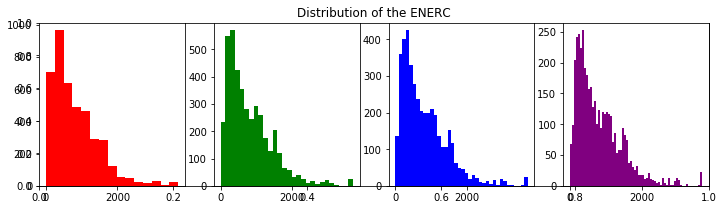

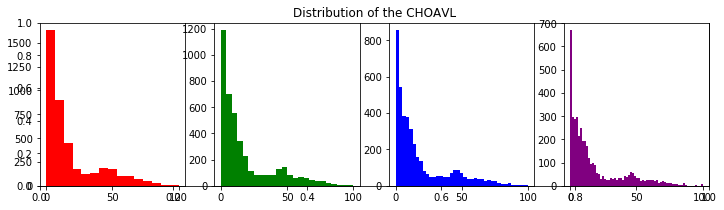

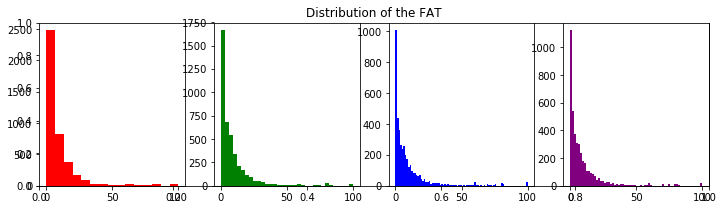

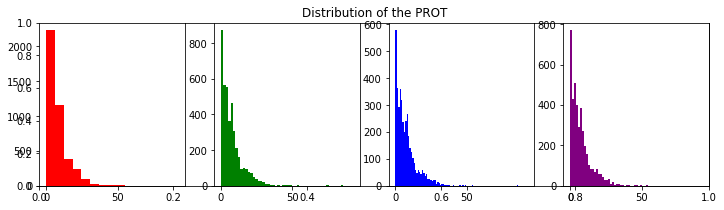

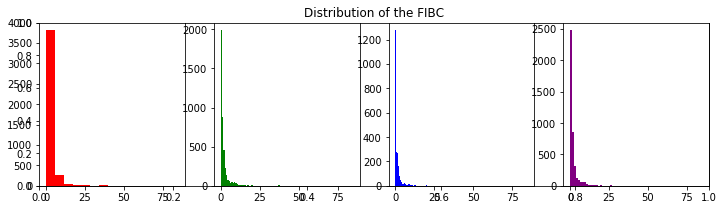

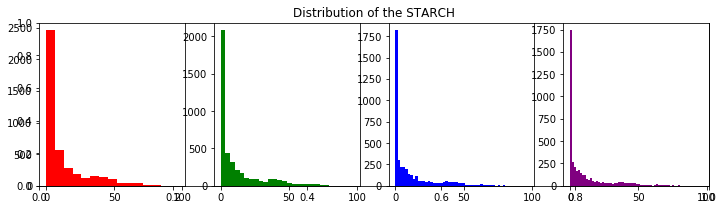

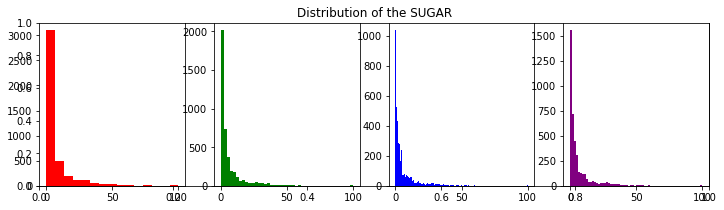

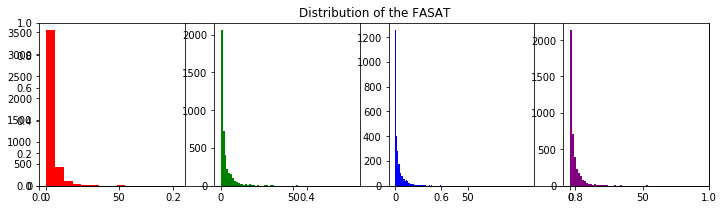

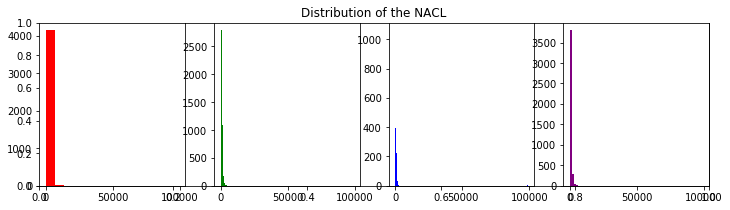

In [36]:
plot_histograms(foods)

In [43]:
def top(lst, results=10):
    s = sorted(lst, reverse=True)
    return s[:results]

for i, title in enumerate(titles):
    print(f"Top values in {title}:")
    print(top(foods[i,:]))


Top values in ENERC:
[3700.0, 3700.0, 3700.0, 3700.0, 3700.0, 3700.0, 3700.0, 3700.0, 3700.0, 3700.0]
Top values in CHOAVL:
[100.0, 99.995, 99.9, 99.9, 99.9, 99.8, 97.0, 95.0, 94.8, 94.0]
Top values in FAT:
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Top values in PROT:
[92.5, 89.94, 85.63, 85.0, 82.69, 75.0, 74.25, 63.0, 58.13, 55.1]
Top values in FIBC:
[85.0, 69.7, 47.1, 44.4, 42.8, 39.0, 37.7, 37.5, 37.4, 37.0]
Top values in STARCH:
[97.0, 95.0, 91.1, 91.0, 90.14, 86.0, 85.0, 83.21, 83.21, 82.19]
Top values in SUGAR:
[100.0, 99.9, 99.9, 99.9, 99.8, 95.0, 86.566, 84.126, 81.0, 80.8]
Top values in FASAT:
[91.3171, 86.5, 81.5, 64.3657, 59.9, 59.6, 57.216, 55.7755, 52.7954, 52.7799]
Top values in NACL:
[98607.6, 98607.6, 98607.6, 95804.8, 71089.2, 69713.28, 53508.0, 50960.0, 48412.0, 45354.4]


## 2. Boxplots


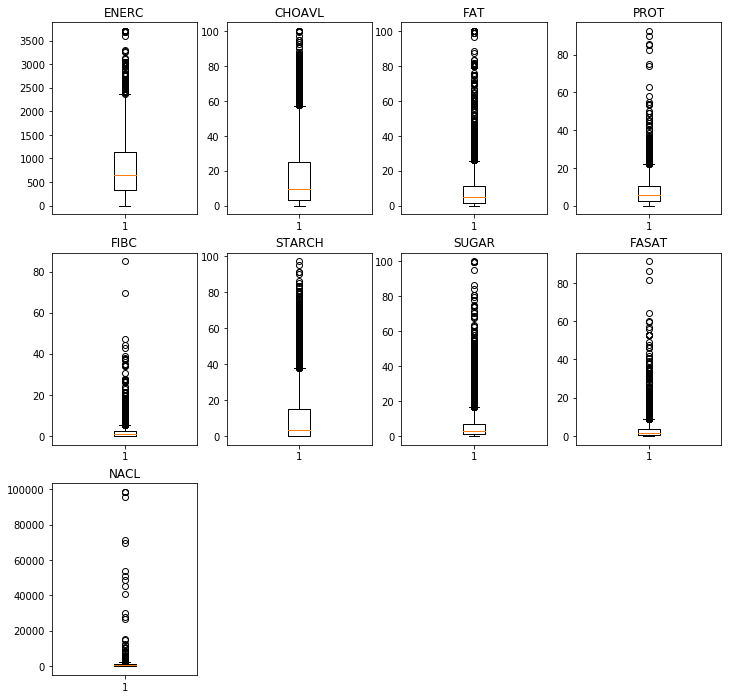

In [65]:
import math

def plot_boxplots(items):
    fig = plt.figure(1, figsize=(12, 12))

    num_cols = 4

    num_features, _ = items.shape
    num_rows = math.ceil(num_features / num_cols)
    num_cells = num_rows * num_cols

    for idx, item in enumerate(items):
        ax = fig.add_subplot(num_rows, num_cols, idx+1)
        try:
            ax.boxplot(items[idx])
            plt.title(titles[idx])
        except IndexError:
            pass
    
    plt.show()

plot_boxplots(foods)

## 3. Scatter plot and parallel coordinates

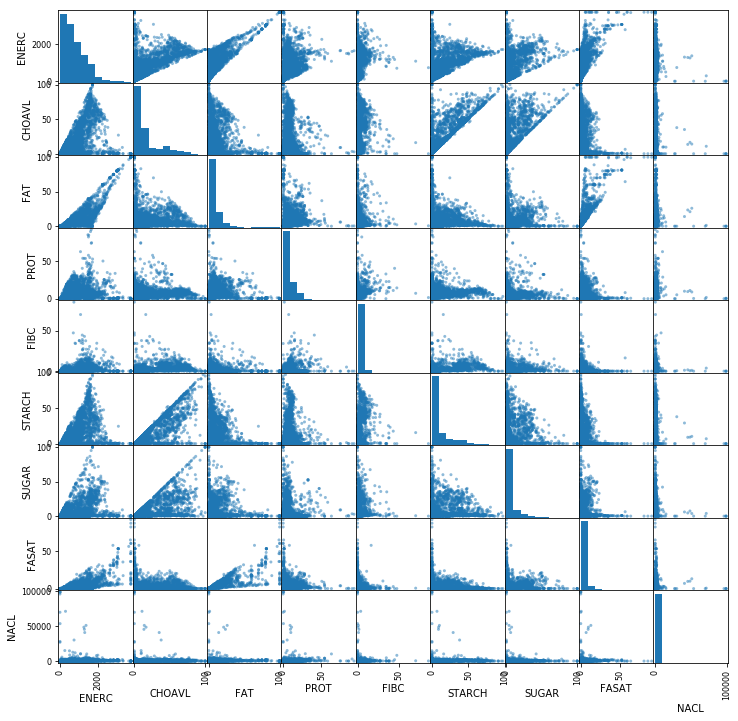

In [68]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from pandas import DataFrame

def plot_scatter(items):
    df = DataFrame(items.T, columns=titles)
    scatter = scatter_matrix(df, figsize=(12, 12))

    plt.show()

plot_scatter(foods)

In [70]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import normalize
from pandas import DataFrame

#plt.close('all')
#df = pandas.read_csv("wine-quality/winequality-red.csv", delimiter=';')

def plot_parallel(items):
    plt.figure(figsize=(12, 6))

    df = DataFrame(items.T, columns=titles)
    #df = df.sort_values('quality')
    df_norm = (df - df.mean()) / (df.max() - df.min())
    #pc = parallel_coordinates(df_norm, 'quality', colormap='Greens')
    pc = parallel_coordinates(df_norm, colormap='Greens')
    plt.show()

plot_parallel(foods)

TypeError: parallel_coordinates() missing 1 required positional argument: 'class_column'

<Figure size 864x432 with 0 Axes>

## 4. Principal component analysis

The data is projected to the first two principal components both with and without normalization.

Some outliers make an impact on the non-normalized data.

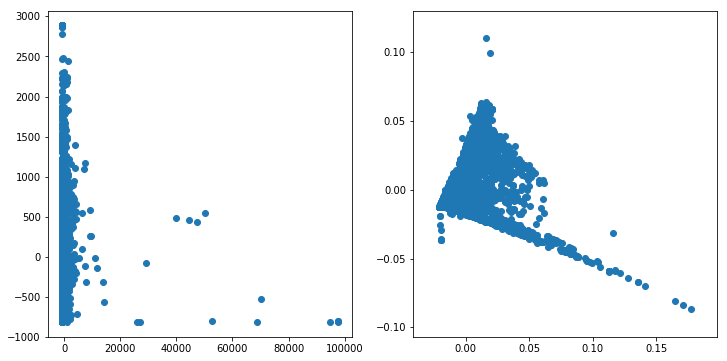

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# https://plot.ly/ipython-notebooks/principal-component-analysis/

def plot_pca(items):
    
    pca = PCA(n_components=2)
    Xpca = pca.fit_transform(items.T)

    pca = PCA(n_components=2)
    Xpca_norm = pca.fit_transform(normalize(items.T, axis=0))

    fig = plt.figure(1, figsize=(12, 6))
    plt.clf()
    plt.subplot(1,2,1)
    plt.scatter(Xpca[:,0], Xpca[:,1]) #, c=items[0])

    plt.subplot(1,2,2)
    plt.scatter(Xpca_norm[:,0], Xpca_norm[:,1]) #, c=items[0])
    #plt.colorbar()
    plt.show()

plot_pca(foods)


## Multi-Dimensional Scaling


In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import normalize

# Commented out not to process it every time, instead read from file
#np.save("mds_save.npy", Xmds)
#np.save("mds_save_norm.npy", Xmds_norm)
#Xmds = np.load("mds_save.npy")
#Xmds_norm = np.load("mds_save_norm.npy")

def plot_mds(items):
    
    # non-normalized
    mds = MDS(n_components=2)
    Xmds = mds.fit_transform(items.T)

    fig = plt.figure(1, figsize=(12, 6))
    plt.subplot(1,2,1)
    plt.scatter(Xmds[:,0], Xmds[:,1], c=Xmds[:,-1])

    # normalized
    mds_norm = MDS(n_components=2)
    Xmds_norm = mds_norm.fit_transform(normalize(items.T, axis=0))

    plt.subplot(1,2,2)
    plt.scatter(Xmds_norm[:,0], Xmds_norm[:,1], c=Xmds[:,-1])

    plt.show()

plot_mds(foods)

## Pearson’s, Spearman’s rho and Kendall’s tau correlation tables

In [1]:
import numpy
import scipy.stats as st
from pandas import DataFrame

def apply_pearsons(items):
    pearsons = numpy.corrcoef(items, rowvar=1)
    print (np.array_str(pearsons, precision=2, suppress_small=True))

apply_pearsons(foods)

NameError: name 'foods' is not defined

In [35]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html
from scipy.stats import spearmanr

def apply_spearmanr(items):
    rho, p = spearmanr(items.T)
    print (np.array_str(rho, precision=2, suppress_small=True))

apply_spearmanr(foods)


[[ 1.   -0.28  0.66  0.22  0.25 -0.18 -0.09  0.62 -0.71  0.21 -0.07  0.11]
 [-0.28  1.   -0.61  0.03  0.16  0.02  0.09  0.03  0.23 -0.33 -0.22 -0.38]
 [ 0.66 -0.61  1.    0.18  0.11 -0.08  0.01  0.35 -0.55  0.33  0.1   0.21]
 [ 0.22  0.03  0.18  1.    0.21  0.07  0.15  0.42 -0.09  0.04  0.12  0.03]
 [ 0.25  0.16  0.11  0.21  1.    0.    0.13  0.41 -0.23  0.02 -0.28 -0.19]
 [-0.18  0.02 -0.08  0.07  0.    1.    0.79 -0.04  0.12  0.05 -0.08 -0.06]
 [-0.09  0.09  0.01  0.15  0.13  0.79  1.    0.13 -0.01 -0.   -0.26 -0.2 ]
 [ 0.62  0.03  0.35  0.42  0.41 -0.04  0.13  1.   -0.31  0.16 -0.46 -0.18]
 [-0.71  0.23 -0.55 -0.09 -0.23  0.12 -0.01 -0.31  1.   -0.08  0.18 -0.04]
 [ 0.21 -0.33  0.33  0.04  0.02  0.05 -0.    0.16 -0.08  1.    0.21  0.38]
 [-0.07 -0.22  0.1   0.12 -0.28 -0.08 -0.26 -0.46  0.18  0.21  1.    0.48]
 [ 0.11 -0.38  0.21  0.03 -0.19 -0.06 -0.2  -0.18 -0.04  0.38  0.48  1.  ]]


In [45]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html
from scipy.stats import kendalltau

def apply_kendalltau(items):
    for i in range(len(items)-1):
        tau, p = kendalltau(items[i], items[-1])
        print (np.array_str(tau, precision=2, suppress_small=True)) 

apply_kendalltau(foods)

0.08796608678616907
-0.3007786666992406
0.1673179295071883
0.025743999323158982
-0.14891936451686894
-0.04564591418527512
-0.15661215453122615
-0.13661134862580693
-0.034235043325038884
0.29926961934658824
0.3803673050777581
